In [1]:
%matplotlib inline
%run ordinal_probit_class.ipynb

...........
----------------------------------------------------------------------
Ran 11 tests in 0.016s

OK
...........
----------------------------------------------------------------------
Ran 11 tests in 0.011s

OK
......
----------------------------------------------------------------------
Ran 6 tests in 0.011s

OK
...........
----------------------------------------------------------------------
Ran 11 tests in 0.012s

OK


end is lower than start; can happen and will return 0 which will cause neg infs later: [-inf, 0.0, -1.0, 1.0, inf]


...........
----------------------------------------------------------------------
Ran 11 tests in 0.013s

OK
......
----------------------------------------------------------------------
Ran 6 tests in 0.012s

OK
../var/folders/z3/65sxpv5n3csdhfzm0ysx30940000gp/T/ipykernel_4847/1708160516.py:58: RuntimeWarning: divide by zero encountered in log
  LLQ += counts * np.log(prob) # this means fewer calls to lookup table
/var/folders/z3/65sxpv5n3csdhfzm0ysx30940000gp/T/ipykernel_4847/3383718926.py:262: RuntimeWarning: divide by zero encountered in log
  real_LP_1 = np.sum(np.log([max(0,
.

end is lower than start; can happen and will return 0 which will cause neg infs later: [-inf, 0.0, -1.0, 1.0, inf]
Some thetas out of order after proposal: proposed: [-inf, 1.5, 1.3, 3.5, inf]            These will throw -infs, but will always be rejected.
np.inf returned; should only really happen with thetas out of order:[-inf, 1.5, 1.3, 3.5, inf]
LL: -inf
LP: -3.4768155996140178
A is -inf: A -inf; A1 -inf A2 -6.92554331291155 A3 -0.2255550003176261



----------------------------------------------------------------------
Ran 3 tests in 0.019s

OK


## Demo
This notebook is a demo for the Movies example in "Analyzing ordinal data with metric models: What could possibly go wrong?", Torrin M.Liddell and John K.Kruschke, 2018 (https://www.sciencedirect.com/science/article/abs/pii/S0022103117307746; https://osf.io/53ce9/) and the ordinal probit class defined in this repository. All links are local, and data is small enough to be stored within the repo. 

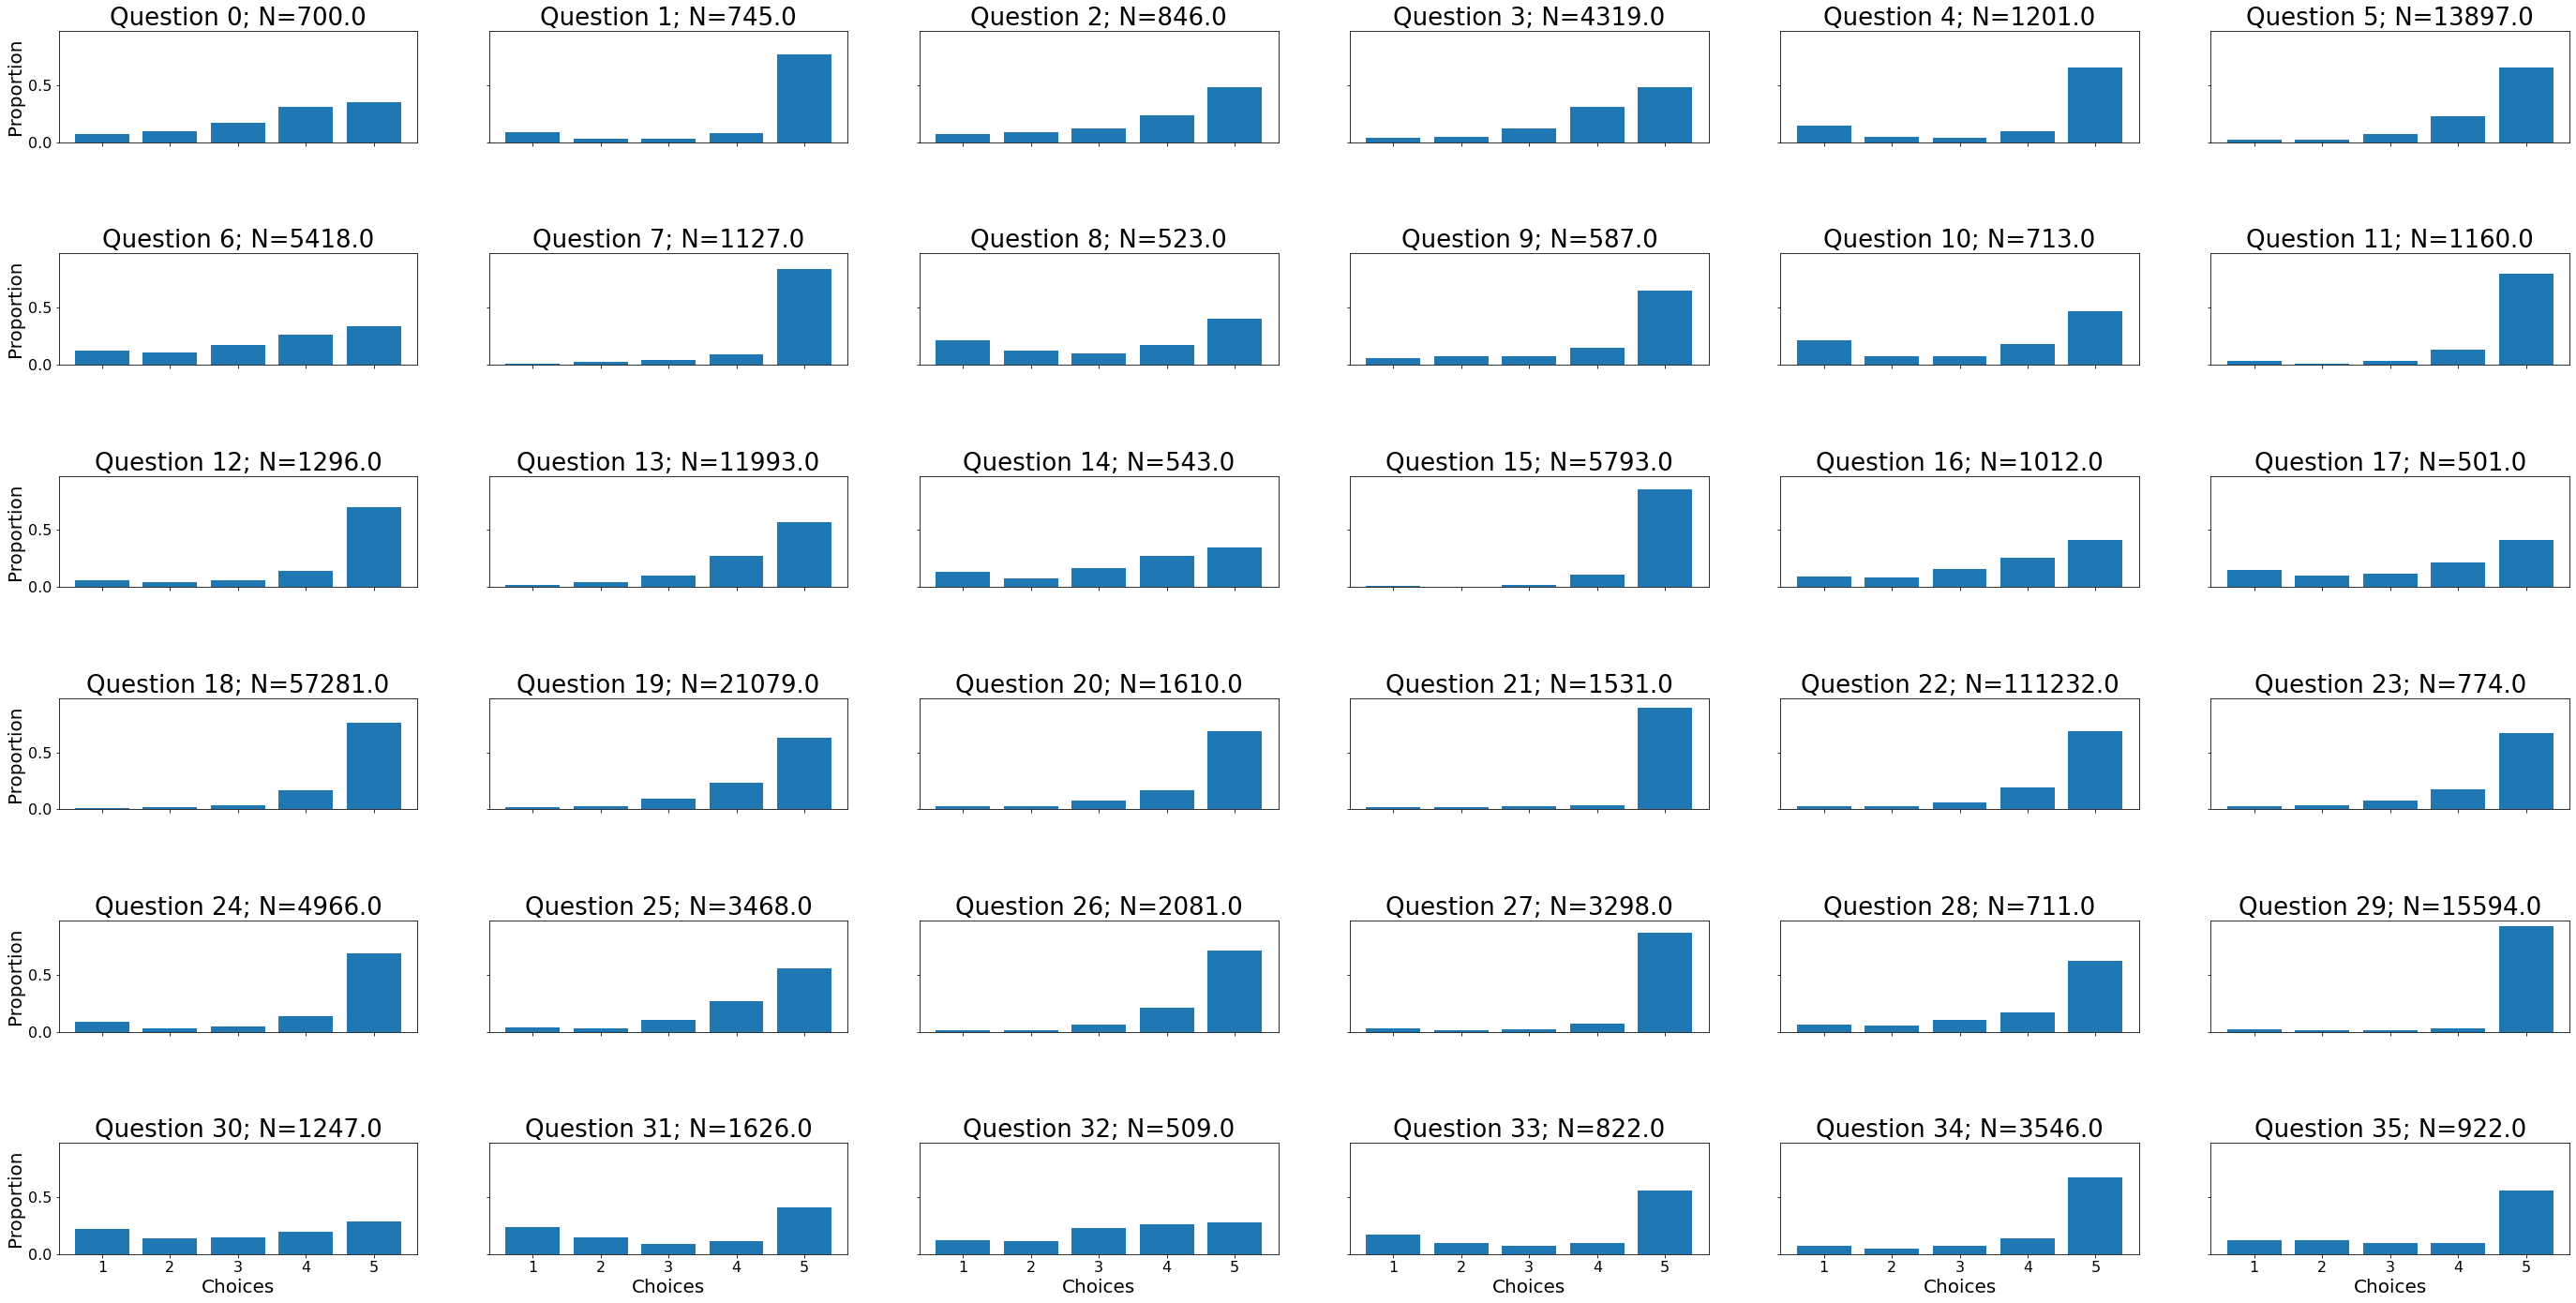

In [2]:
# load cleaned data with helper functions and plot scaled survey responses.
data_dir = 'data'
load_path = '{}/MoviesData.npy'.format(data_dir)
cleanData = load_cleaned_data(load_path)
plot_data(cleanData)

In [3]:
# define class
k = 5
num_samples = 1000
slice_frequency = 10
print_frequency = 100
burn_in = 30
testClass = OrdinalProbitSurveyData(cleanData, k, num_samples=num_samples, 
                                    slice_frequency=slice_frequency, print_frequency=print_frequency, debug=True, printing=False)

In [4]:
# run single chain / sampler
samples = testClass.MH_sample()

Running sampler!

on sample 0 / 1000. 
 last saved LL was: [-404410.2314252807]

on sample 100 / 1000. 
 last saved LL was: [-259906.25972094486]


/var/folders/z3/65sxpv5n3csdhfzm0ysx30940000gp/T/ipykernel_4847/1708160516.py:58: RuntimeWarning: divide by zero encountered in log
  LLQ += counts * np.log(prob) # this means fewer calls to lookup table


Some thetas out of order after proposal: proposed: [      -inf 1.5        3.2190374  3.08173236 4.5               inf]            These will throw -infs, but will always be rejected.
np.inf returned; should only really happen with thetas out of order:[      -inf 1.5        3.2190374  3.08173236 4.5               inf]
LL: -inf
LP: -10.127345034607343
A is -inf: A -inf; A1 -inf A2 -259793.6480905763 A3 -0.007690842867907222

on sample 200 / 1000. 
 last saved LL was: [-259785.96919665823]
Some thetas out of order after proposal: proposed: [      -inf 1.5        2.26006461 2.21790902 4.5               inf]            These will throw -infs, but will always be rejected.
np.inf returned; should only really happen with thetas out of order:[      -inf 1.5        2.26006461 2.21790902 4.5               inf]
LL: -inf
LP: -10.147532307870481
A is -inf: A -inf; A1 -inf A2 -259797.12559988804 A3 0.00838853590669597

on sample 300 / 1000. 
 last saved LL was: [-259778.72397661678]

on sample 400 / 

/Users/ruairidh/miniconda3/envs/ordinal_probit/lib/python3.9/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


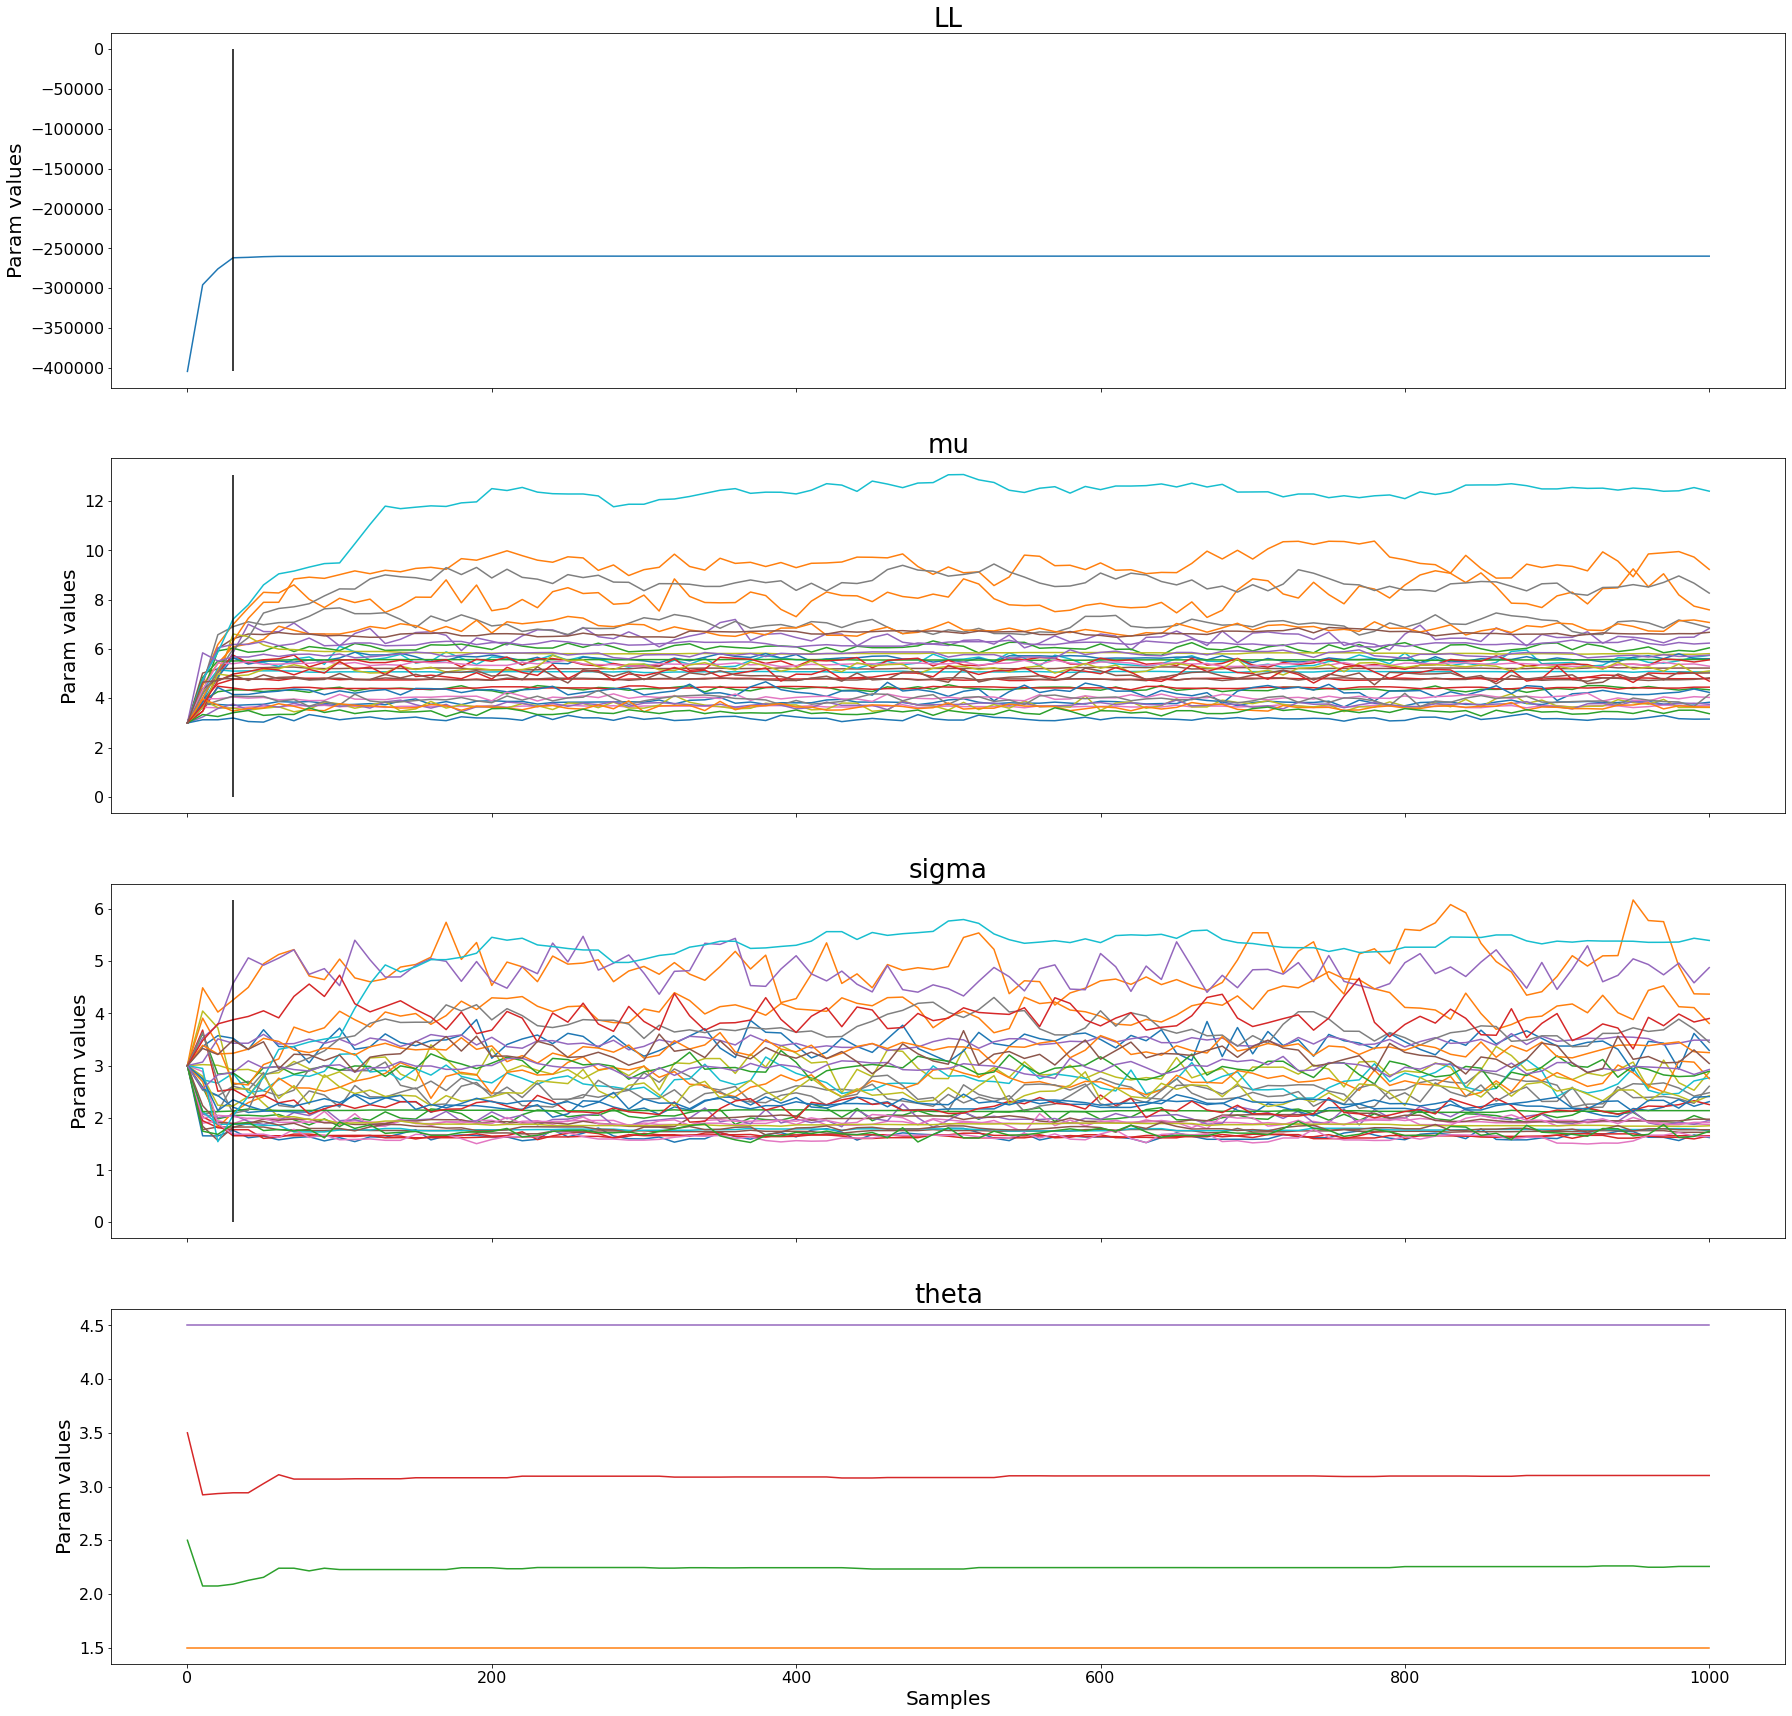

In [5]:
# plot values of sampled parameters to check convergence
sample_plot(samples, burn_in, slice_frequency)

In [6]:
# discard burn_in samples and calculate posterior predictive distributions
clean_samples = discard_burn_in(samples, burn_in=burn_in)

postPreds = posterior_predictive_distributions(clean_samples)

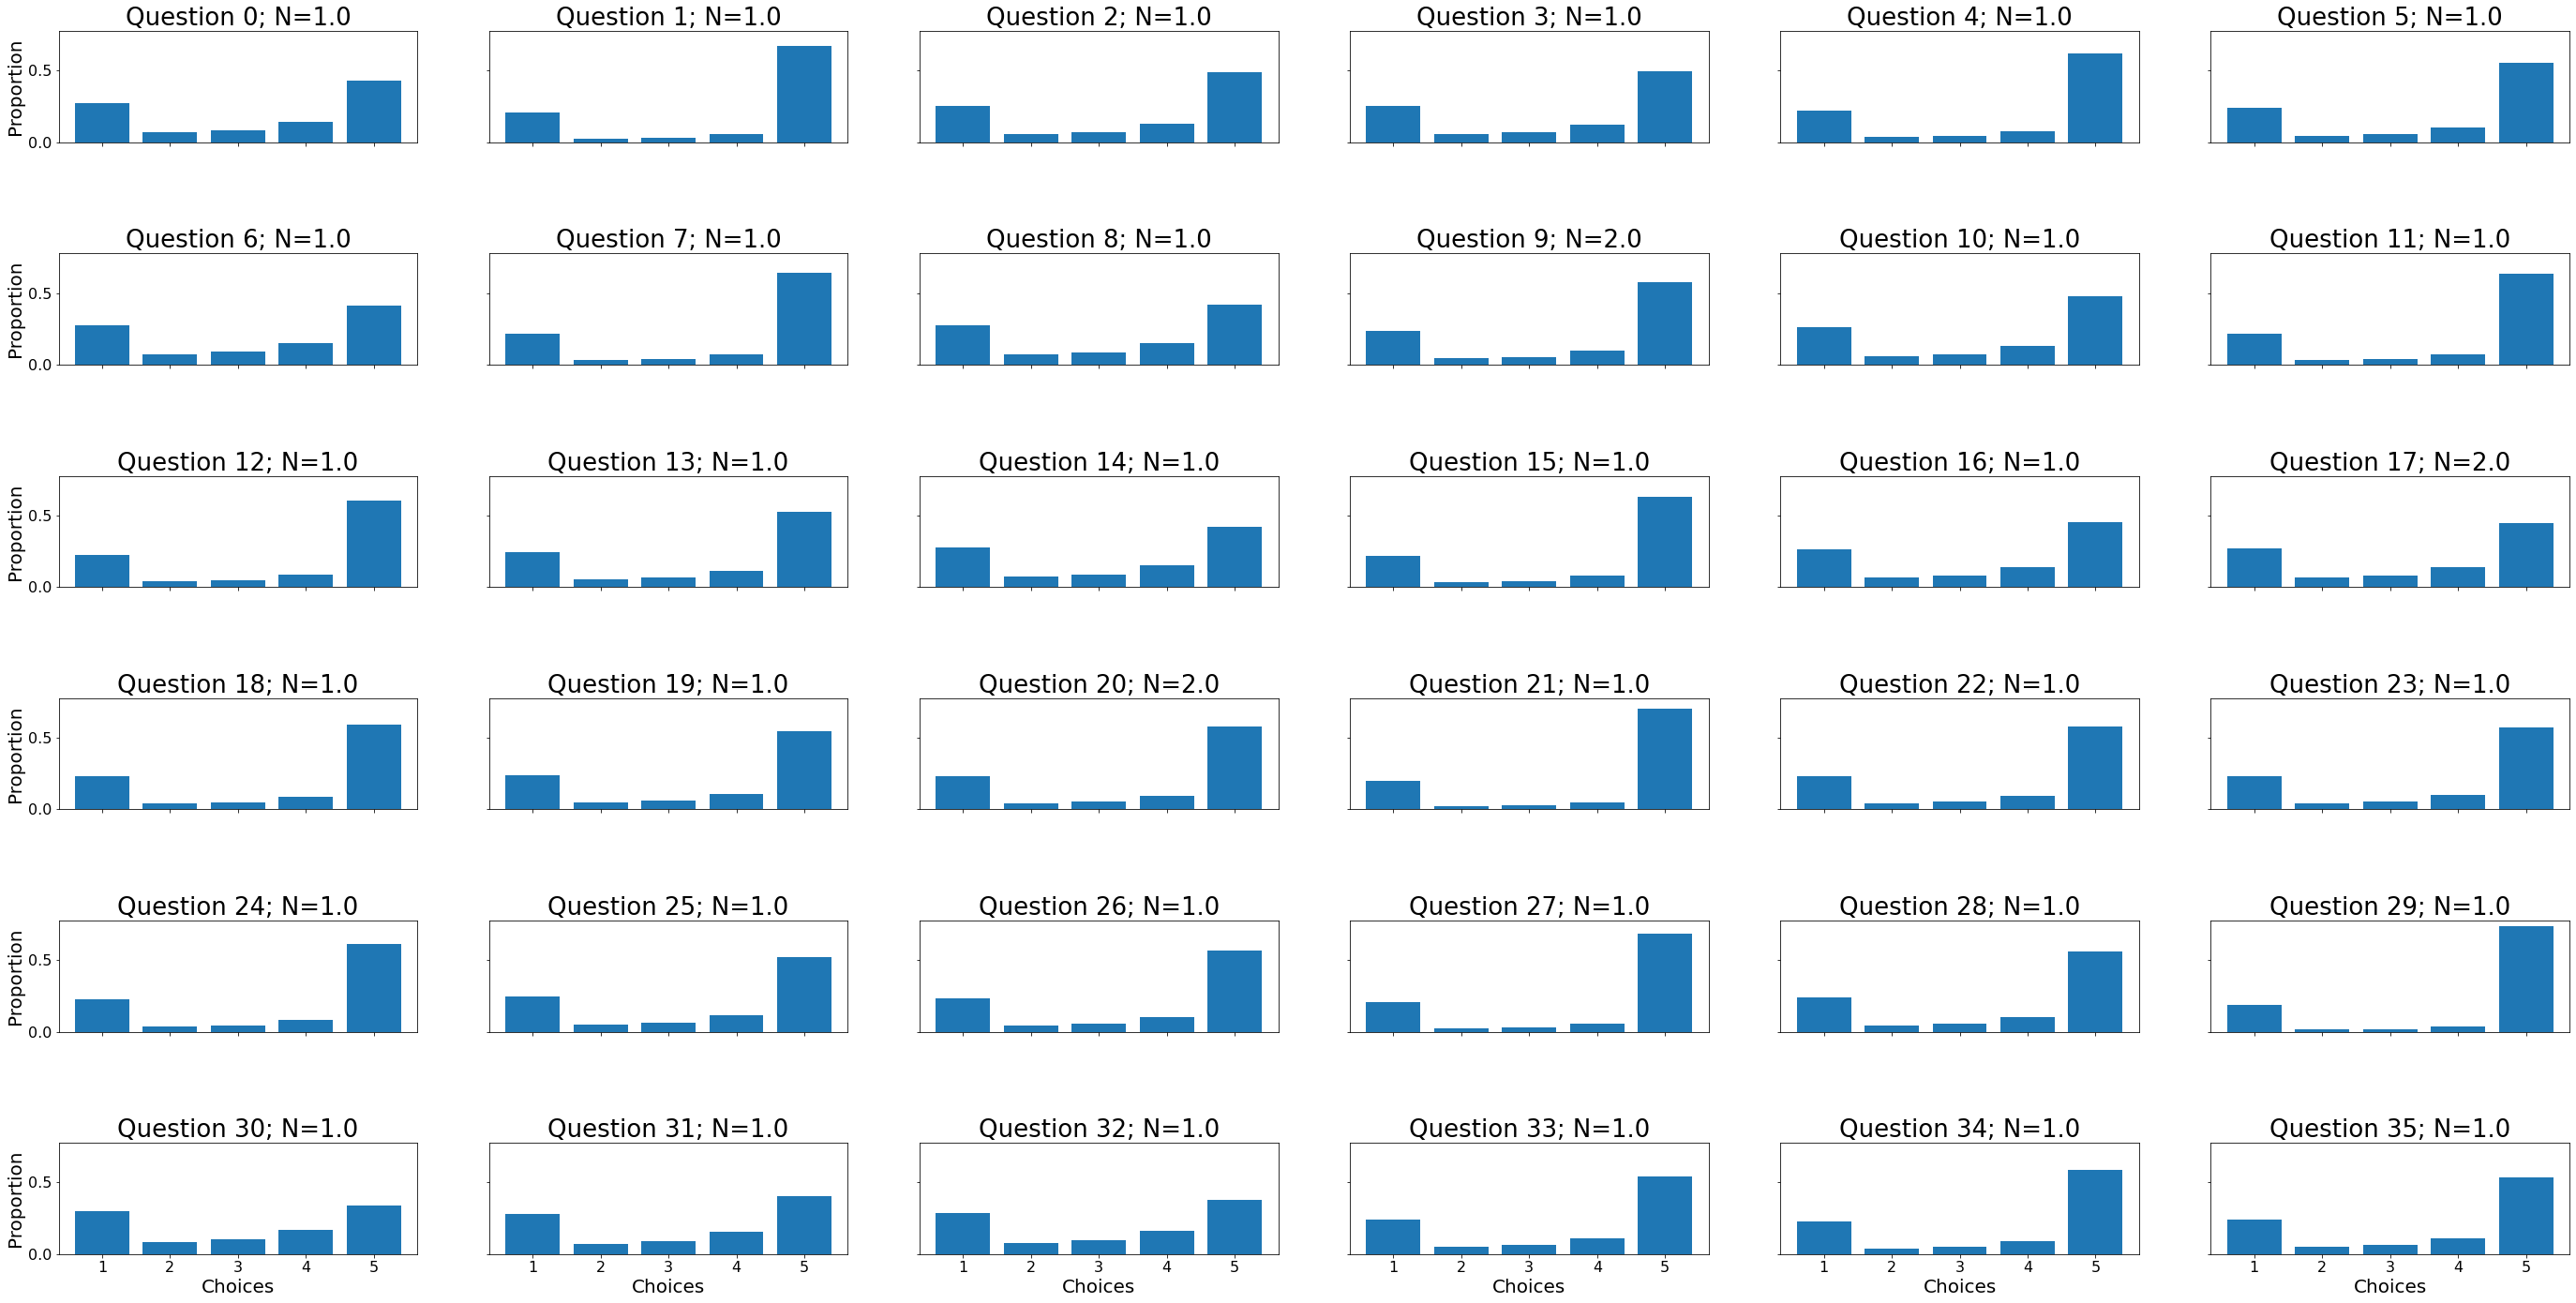

In [7]:
# plot posterior predictive distributions
plot_data(postPreds)

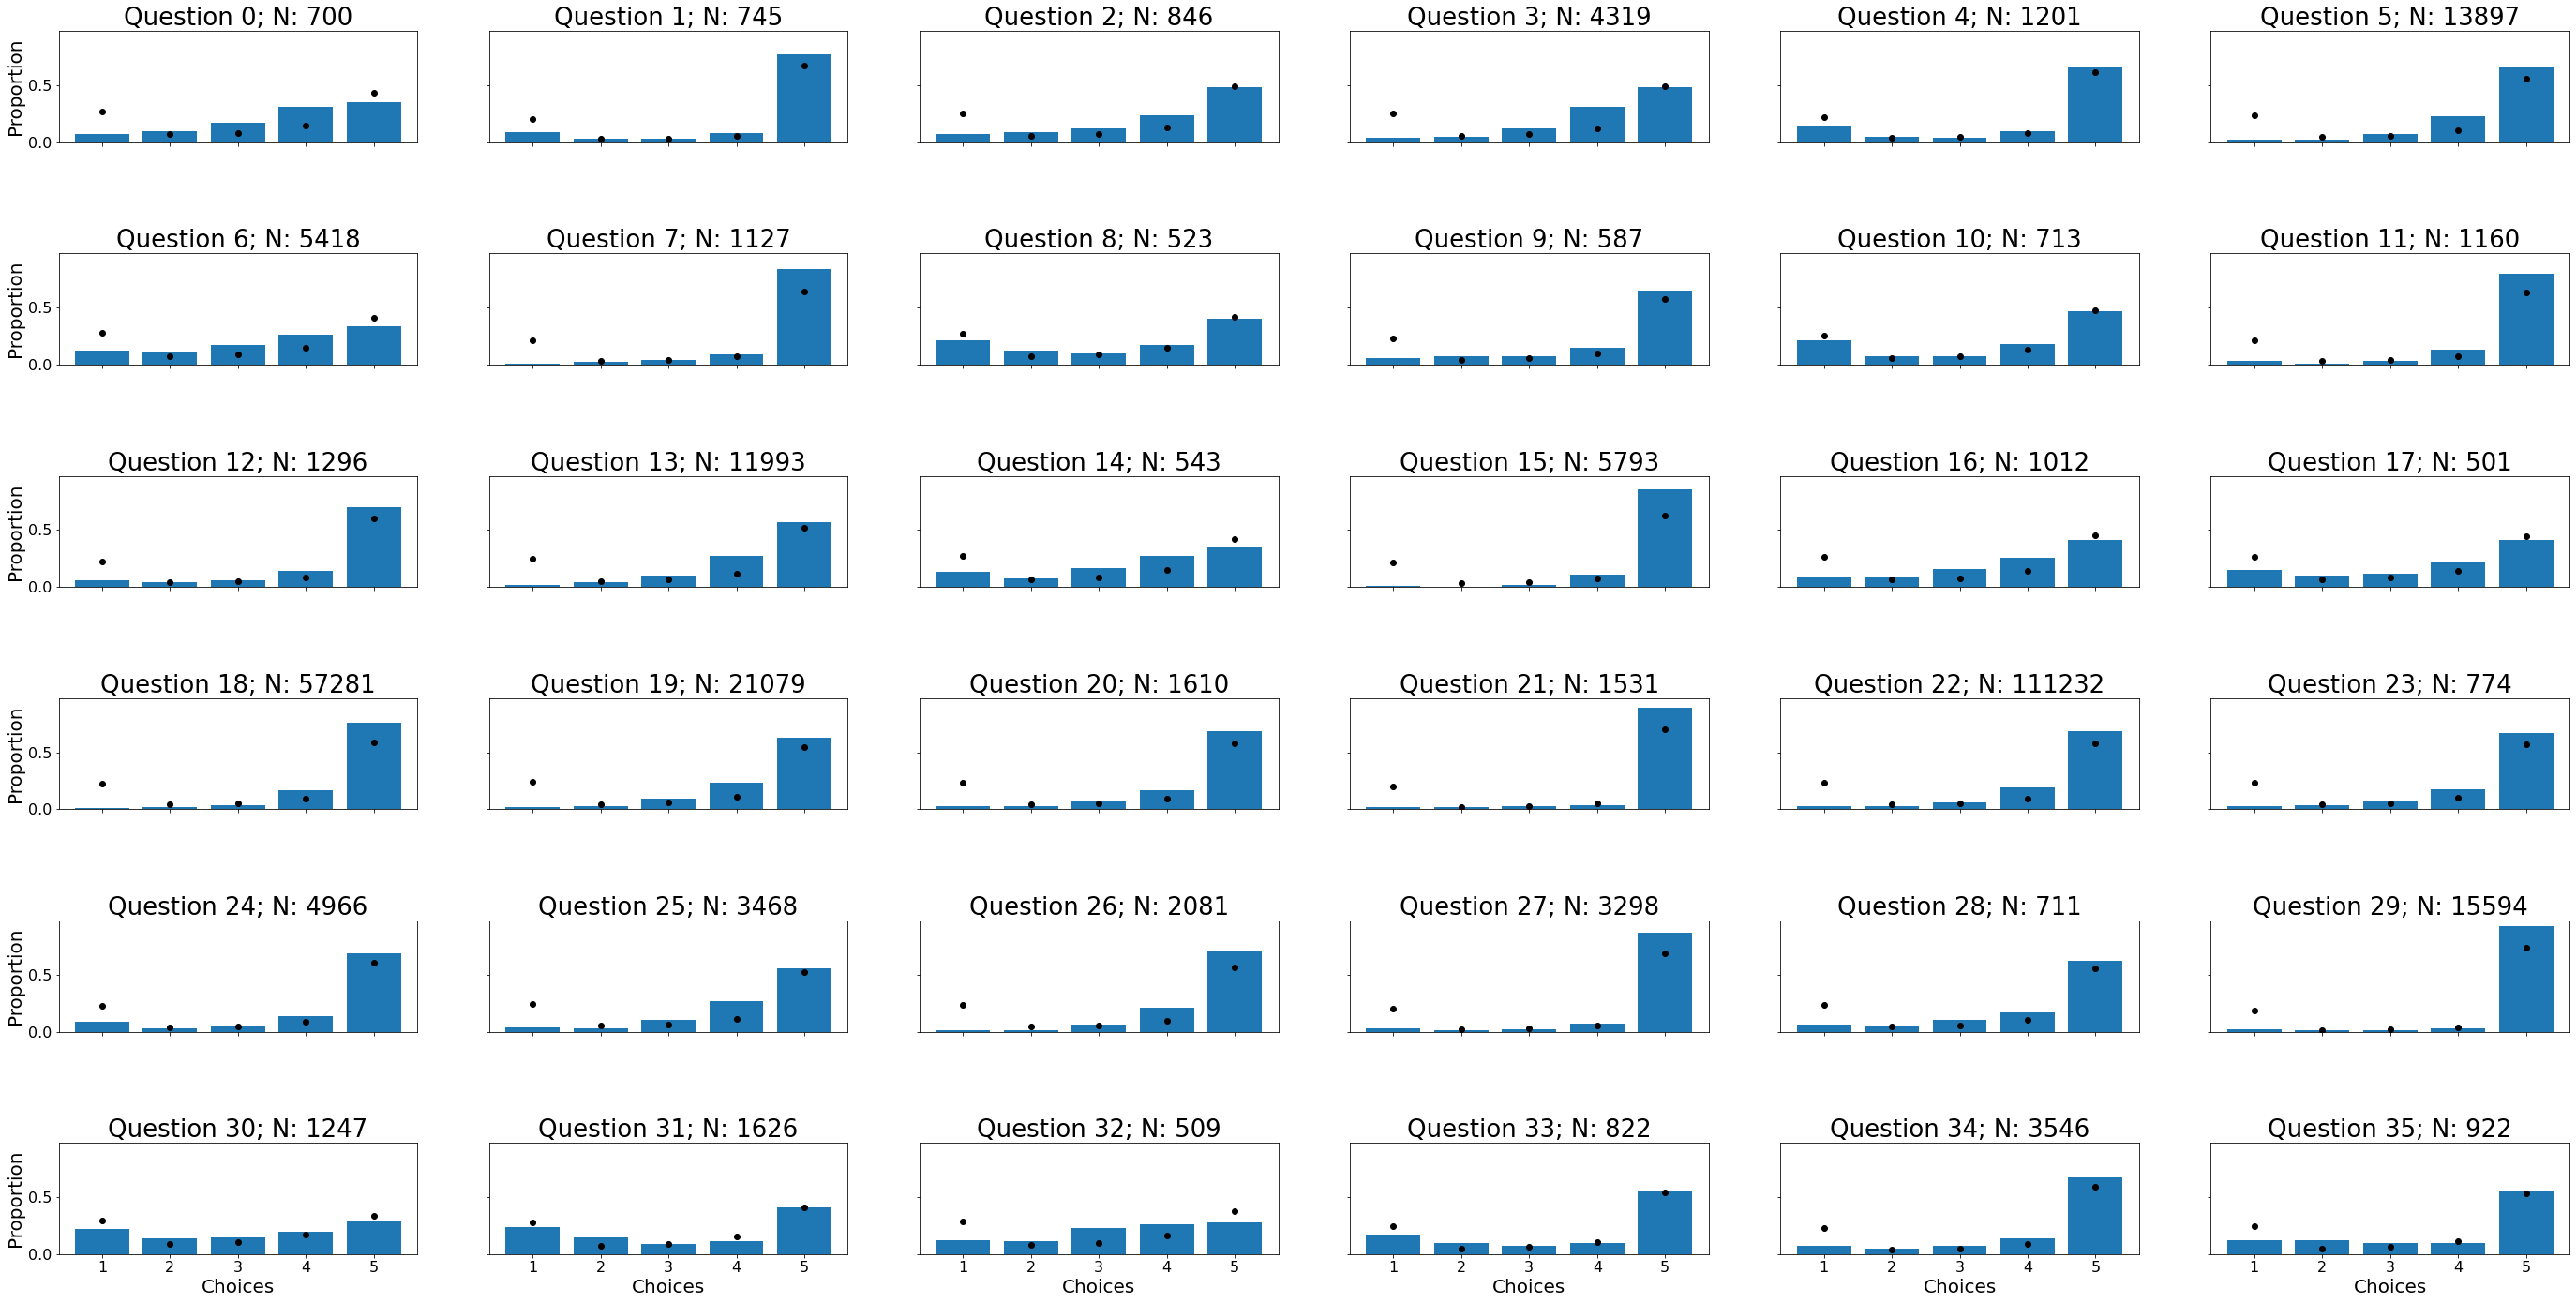

In [8]:
# overlay plots as in original paper
overlay_data(cleanData, postPreds)